# Regluarization comparison for multilayer perceptron networks
This notebooks looks to examplify how various levels of regularization can affect the results of a multiplayer perceptron model. The layer sizes and hyperparameters are predefined to a set of values aiming to give a credible results without the need for any extensive grid search.

## Step 0: Import modules

In [1]:
# %load regularization_comparison.py
import src.core as mlApi
import src.core_configs as configs

Using TensorFlow backend.


## Step 1: Implement required methods

A method is implemented to perform initialization, training and predictions for a model. These are all functions of the high-level API, and thus nothing out of the ordinary. The function is simply implemented for simplification of the following code.

In [2]:
def initAndPredict(modelList):
    # 4. Initiate and train models
    mlApi.initModels(modelList)
    retrain=False
    mlApi.trainModels(retrain)

    # 5. Predict
    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
        plot=True,
        interpol=False,
    )

# Dataset D

## Features and targets
Model A with the minimal number of features is chosen for comparing degrees of regularization. with the addition of an inlet pressure sensor (which is constant).

Features: Inlet Process Temperature, Outlet Process Temperature, Process Flow, Inlet Cooling Temperature, Cooling valve opening

Targets: Inlet Cooling Temperature

### Step 2: Define dataset specifics

In [3]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('D', 'A', '30min')

### Step 3: Initiate and divide data

In [4]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20PT001 - Process Inlet Pressure
Col. 2 : 20FT001 - Process Flow Rate
Col. 3 : 20TT002 - Process Outlet Temperature
Col. 4 : 20PDT001 - Process Pressure Difference
Col. 5 : 50TT001 - Coolant Inlet Temperature
Col. 6 : 50PT001 - Coolant Inlet Pressure
Col. 7 : 50FT001 - Coolant Flow Rate
Col. 8 : 50TT002 - Coolant Outlet Temperature
Col. 9 : 50PDT001 - Coolant Pressure Difference
Col. 10 : 50TV001 - Coolant Valve Opening

Columns after removal: 
Col. 0 : 20TT001 - Process Inlet Temperature
Col. 1 : 20FT001 - Process Flow Rate
Col. 2 : 20TT002 - Process Outlet Temperature
Col. 3 : 50TT001 - Coolant Inlet Temperature
Col. 4 : 50TT002 - Coolant Outlet Temperature

Finding data between 2020-01-01 00:00:00 and 2020-03-20 00:00:00
Found 315 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows



### Step 4:  Define models

Hidden layer sizes of 1x64 and 2x64 neurons are chosen as they are assumed complex enough to discover possible nonlinearities while still avoiding overfitting due to model complexity. A number of epochs ensuring model convergence is chosen, together with EarlyStopping and ModelCheckpoint callbacks that ensure the best set of weights are stored for predictive use.

Seven different rates of both Lasso and Ridge regularization are added, in addition to a linear model and a model using dropout.

In [5]:
mlpr_1_1 = mlApi.MLP('MLPr 1x64 1.0', layers=[64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr_1_2 = mlApi.MLP('MLPr 1x64 0.5', layers=[64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr_1_3 = mlApi.MLP('MLPr 1x64 0.1', layers=[64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr_1_4 = mlApi.MLP('MLPr 1x64 0.05', layers=[64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr_1_5 = mlApi.MLP('MLPr 1x64 0.01', layers=[64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr_1_6 = mlApi.MLP('MLPr 1x64 0.005', layers=[64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr_1_7 = mlApi.MLP('MLPr 1x64 0.001', layers=[64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpd_1_8 = mlApi.MLP('MLPd 1x64 0.2', layers=[64], dropout=0.2, epochs=5000)

mlpr_2_1 = mlApi.MLP('MLPr 2x64 1.0', layers=[64, 64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr_2_2 = mlApi.MLP('MLPr 2x64 0.5', layers=[64, 64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr_2_3 = mlApi.MLP('MLPr 2x64 0.1', layers=[64, 64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr_2_4 = mlApi.MLP('MLPr 2x64 0.05', layers=[64, 64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr_2_5 = mlApi.MLP('MLPr 2x64 0.01', layers=[64, 64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr_2_6 = mlApi.MLP('MLPr 2x64 0.005', layers=[64, 64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr_2_7 = mlApi.MLP('MLPr 2x64 0.001', layers=[64, 64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpd_2_8 = mlApi.MLP('MLPd 2x64 0.2', layers=[64, 64], dropout=0.2, epochs=5000)

linear_r = mlApi.Linear_Regularized('linear')

### Step 5: Initiate and predict

Model MLPr 1x64 1.0 was loaded from file
Model MLPr 1x64 0.5 was loaded from file
Model MLPr 1x64 0.1 was loaded from file
Model MLPr 1x64 0.05 was loaded from file
Model MLPr 1x64 0.01 was loaded from file
Model MLPr 1x64 0.005 was loaded from file
Model MLPr 1x64 0.001 was loaded from file
Model MLPd 1x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  MLPr 1x64 1.0  |  1.16039  |   1.160531  |    0.412567   |  1571  |
|  MLPr 1x64 0.5  |  1.160386 |   1.160532  |    0.412336   |  1522  |
|  MLPr 1x64 0.1  |  1.160388 |   1.160394  |    0.412773   |  1987  |
|  MLPr 1x64 0.05 |  1.170258 |   1.293379  |    0.40947    |  366   |
|  MLPr 1x64 0.01 |  0.040788 |   0.041534  |    0.020588   |  

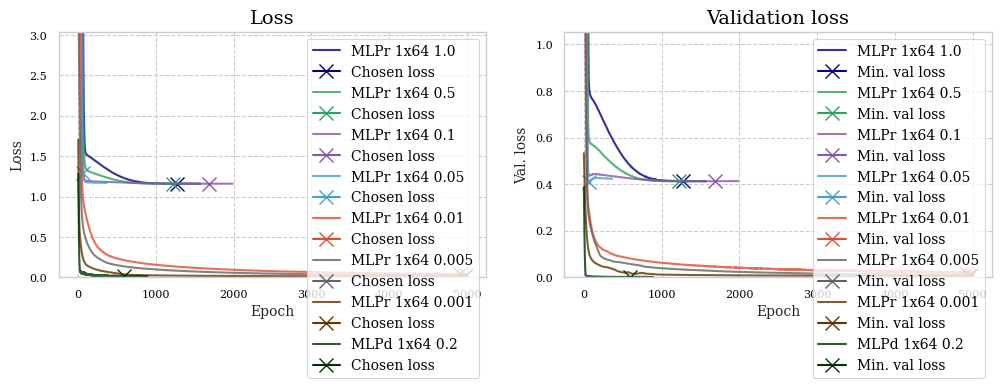

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
|  MLPr 1x64 1.0  |   -0.0108   |   -0.09    |
|  MLPr 1x64 0.5  |   -0.0108   |  -0.0899   |
|  MLPr 1x64 0.1  |   -0.0109   |  -0.0902   |
|  MLPr 1x64 0.05 |    0.0023   |   0.1016   |
|  MLPr 1x64 0.01 |    0.9956   |   0.8778   |
| MLPr 1x64 0.005 |    0.9969   |   0.8552   |
| MLPr 1x64 0.001 |    0.9977   |   0.8915   |
|  MLPd 1x64 0.2  |    0.9977   |   0.7547   |
|      linear     |    0.9947   |   0.8842   |
+-----------------+-------------+------------+


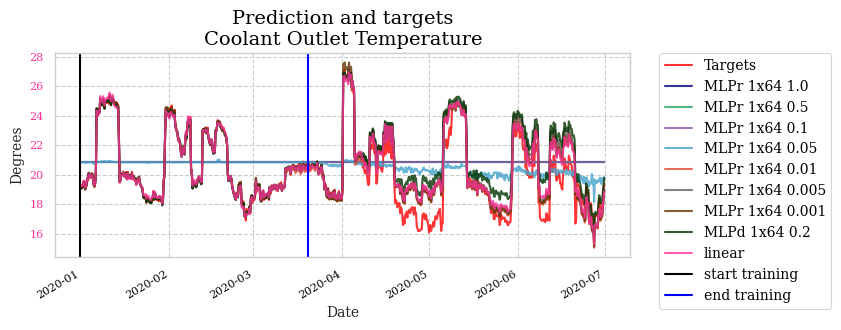

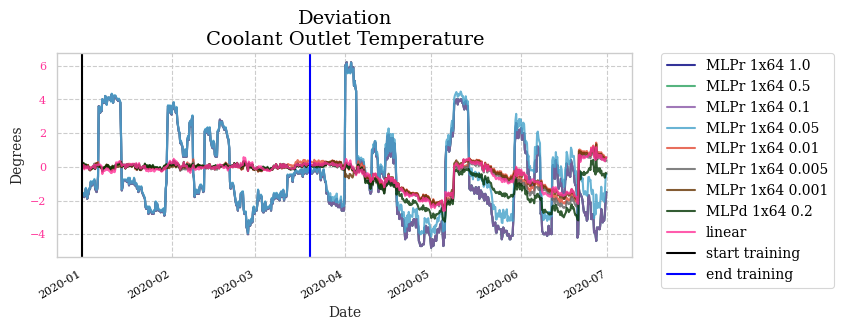

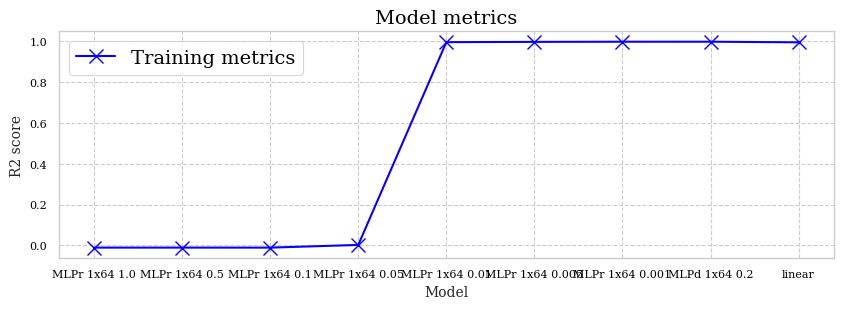

In [6]:
initAndPredict([
        mlpr_1_1, mlpr_1_2, mlpr_1_3, mlpr_1_4, mlpr_1_5, mlpr_1_6, mlpr_1_7, mlpd_1_8, linear_r,
    ])

## Model evaluation 1
From the above model metrics, we see that model 1-4 with regularization ranging from 1.0 to 0.05 have converged to the dataset mean. This is indicated by the R2 score of 0. In short, this means the degree of regularization has been too high for the network to train appropriate weights, because any change in weights will result in a larger loss increase by penalizing the weights than loss decrease by fitting the model.

Model MLPr 1x64 0.005 was loaded from file
Model MLPr 1x64 0.001 was loaded from file
Model MLPd 1x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
| MLPr 1x64 0.005 |  0.025187 |   0.025296  |    0.010864   |  5000  |
| MLPr 1x64 0.001 |  0.010774 |   0.010834  |    0.006061   |  5000  |
|  MLPd 1x64 0.2  |  0.010448 |   0.01307   |    0.002021   |  891   |
+-----------------+-----------+-------------+---------------+--------+


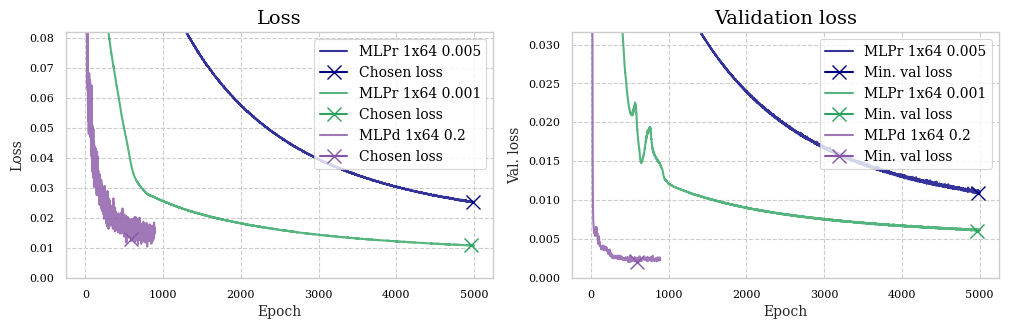

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| MLPr 1x64 0.005 |    0.9969   |   0.8552   |
| MLPr 1x64 0.001 |    0.9977   |   0.8915   |
|  MLPd 1x64 0.2  |    0.9977   |   0.7547   |
|      linear     |    0.9947   |   0.8842   |
+-----------------+-------------+------------+


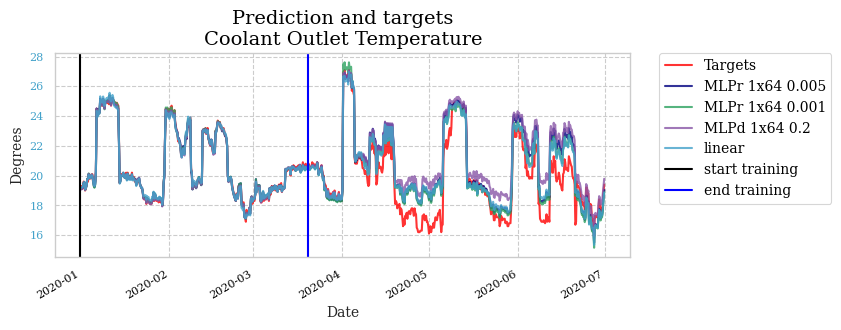

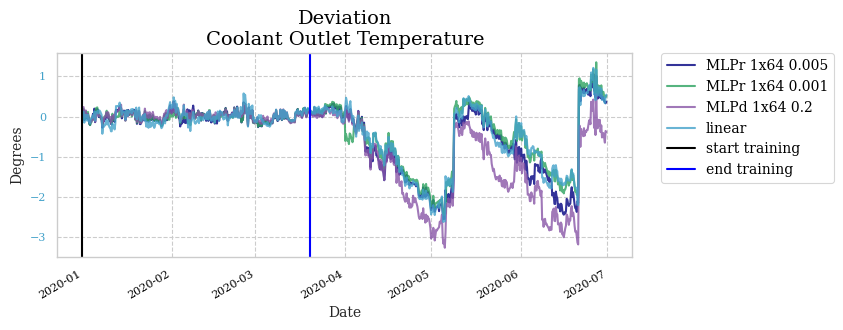

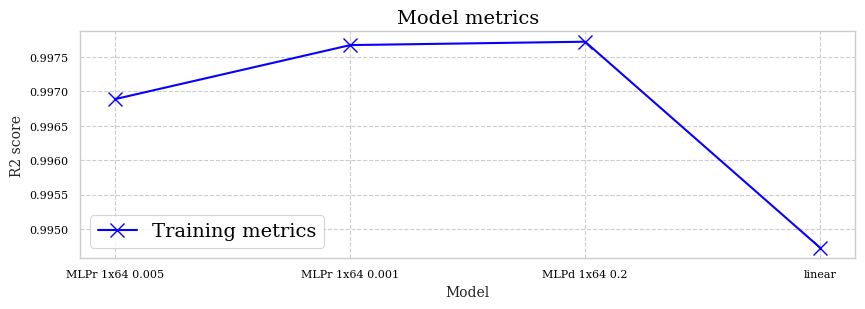

In [7]:
initAndPredict([
        mlpr_1_6, mlpr_1_7, mlpd_1_8, linear_r,
    ])

## Model evaluation 2
With the previously discussed models removed, we can easier graph the remaining models. Notice that the model using dropout has converged to a significantly lower loss value, both for the training and validation sample. This model has also converged in a significantly lower amount of epochs.

The R2 score calculated on the training samples indicate that the model with the lowest amount of regularization and the model with dropout has outperformed the linear model. Do note that the R2 score calculated on the test set is not relevant for evaluating model fit, because the test set contains samples with fouling for which we want to predict a certain level of deviation between predicted and measured values. Model fit based on the training data should therefore be evaluated on the validation loss.

Because the testing metrics are not representative of how well the model can predict fouling, we must evaluate the remaining models using a manual approach. First, we notice that the linear model has a shape much alike the added levels of fouling. In fact, it performs much better than all the machine learning models in this regard. All MLP models have very similar predictions, showing a promising general trend. However, they all fail to identify the fouling increase along some parts of the expected-to-be linear increase from 2020-04-01 to 2020-05-05 and from 2020-05-05 to 2020-06-20 as accurately as the linear model.

Although somewhat discouraging with regards to the promise of neural networks' ability to identify fouling, it is important to realize that this is performed on a very limited data sample obtained from simulated values. Most columns of the data set are highly correlated, and the values observed in the data set is unlikely to correspond to a real processing plant. For instance, a very varying rate of cooling medium can be observed right around the time where the MLPs perform poorly, indicating that the models have not obtained sufficient data samples to correctly identify the relation between cooling flow and output temperture.

Model MLPr 2x64 1.0 was loaded from file
Model MLPr 2x64 0.5 was loaded from file
Model MLPr 2x64 0.1 was loaded from file
Model MLPr 2x64 0.05 was loaded from file
Model MLPr 2x64 0.01 was loaded from file
Model MLPr 2x64 0.005 was loaded from file
Model MLPr 2x64 0.001 was loaded from file
Model MLPd 2x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  MLPr 2x64 1.0  |  1.160438 |   1.163784  |    0.397648   |  1328  |
|  MLPr 2x64 0.5  |  1.161244 |   1.169657  |    0.398525   |  1056  |
|  MLPr 2x64 0.1  |  0.022316 |   0.023808  |    0.009733   |  4148  |
|  MLPr 2x64 0.05 |  0.022883 |   0.027436  |    0.010916   |  1881  |
|  MLPr 2x64 0.01 |  0.007054 |   0.007514  |    0.003815   |  

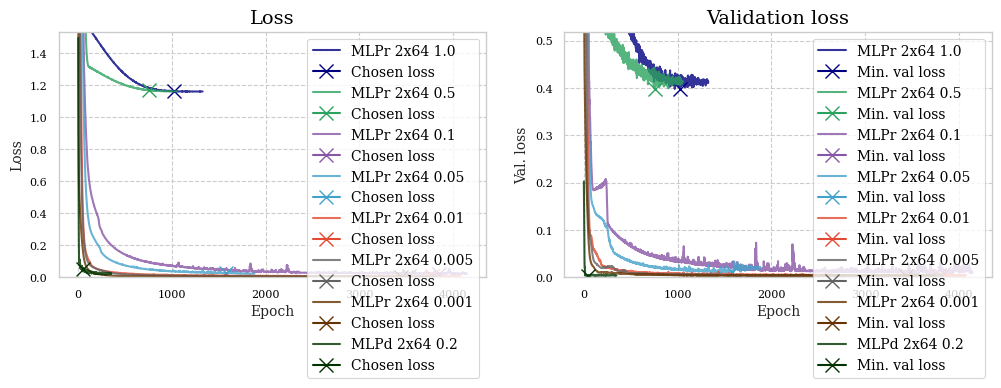

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
|  MLPr 2x64 1.0  |   -0.0078   |  -0.0816   |
|  MLPr 2x64 0.5  |   -0.0068   |  -0.0807   |
|  MLPr 2x64 0.1  |    0.9961   |   0.8389   |
|  MLPr 2x64 0.05 |    0.9937   |   0.7617   |
|  MLPr 2x64 0.01 |    0.9977   |   0.8583   |
| MLPr 2x64 0.005 |    0.9973   |   0.831    |
| MLPr 2x64 0.001 |    0.9982   |   0.8718   |
|  MLPd 2x64 0.2  |    0.9954   |   0.8283   |
|      linear     |    0.9947   |   0.8842   |
+-----------------+-------------+------------+


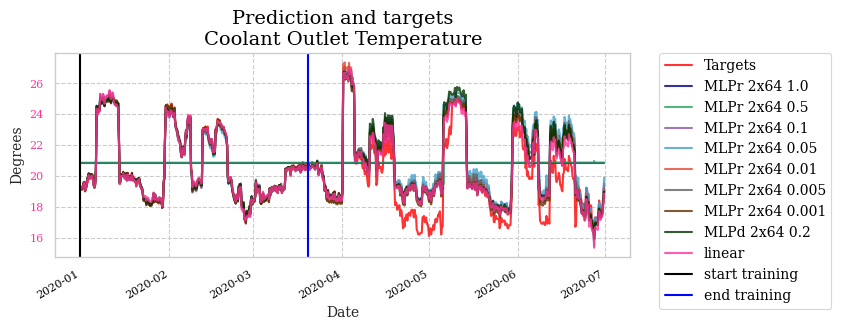

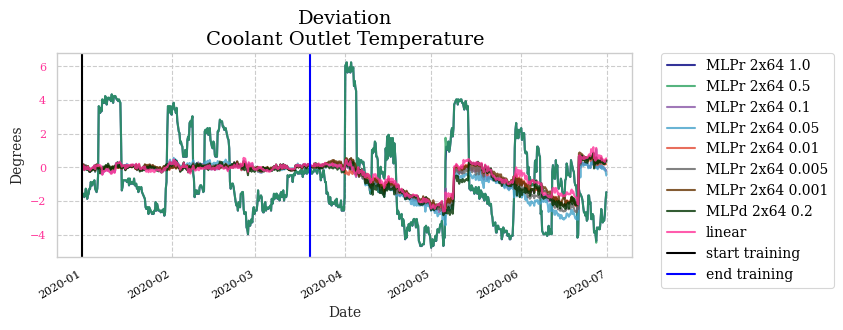

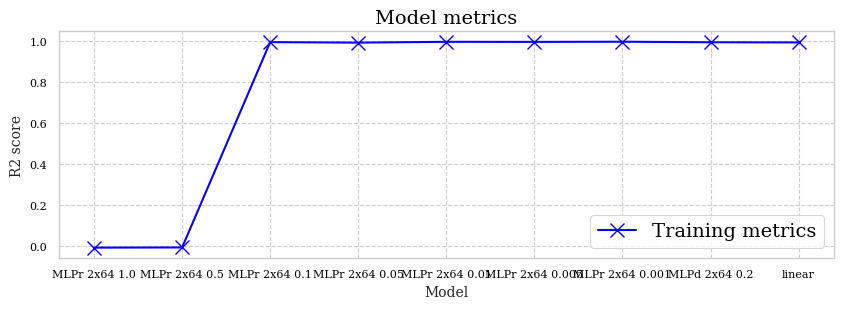

In [8]:
initAndPredict([
        mlpr_2_1, mlpr_2_2, mlpr_2_3, mlpr_2_4, mlpr_2_5, mlpr_2_6, mlpr_2_7, mlpd_2_8, linear_r,
    ])

## Model evaluation 3
As for the less complex models, we can see from the model metrics that the two models with highest regularization have converged to the dataset mean. Additionally, the following two models with regluarization levels of 0.1 and 0.05 have converged to a state for which some areas of prediction show flat lines. This incidates a combination of input values that the models are not able to identify any degree of variation between, which is highly unlikely for any data sample of varying decimal values. These models can therefore be assumed to have converged to non-generalizing sets of weights despite its relatively low loss values.

Model MLPr 2x64 0.005 was loaded from file
Model MLPr 2x64 0.001 was loaded from file
Model MLPd 2x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[-0.14580221 -0.9826879   0.04136934 -0.0390017 ]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
| MLPr 2x64 0.005 |  0.005486 |   0.006386  |    0.003288   |  3830  |
| MLPr 2x64 0.001 |  0.00319  |   0.003477  |    0.003084   |  3744  |
|  MLPd 2x64 0.2  |  0.017638 |   0.051551  |    0.003401   |  349   |
+-----------------+-----------+-------------+---------------+--------+


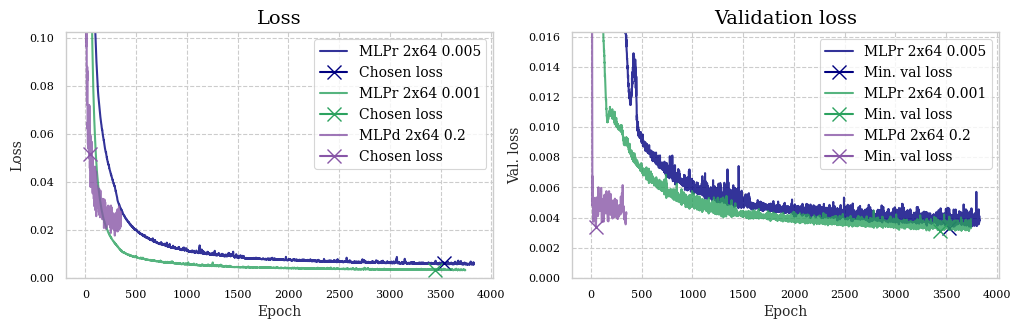

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| MLPr 2x64 0.005 |    0.9973   |   0.831    |
| MLPr 2x64 0.001 |    0.9982   |   0.8718   |
|  MLPd 2x64 0.2  |    0.9954   |   0.8283   |
|      linear     |    0.9947   |   0.8842   |
+-----------------+-------------+------------+


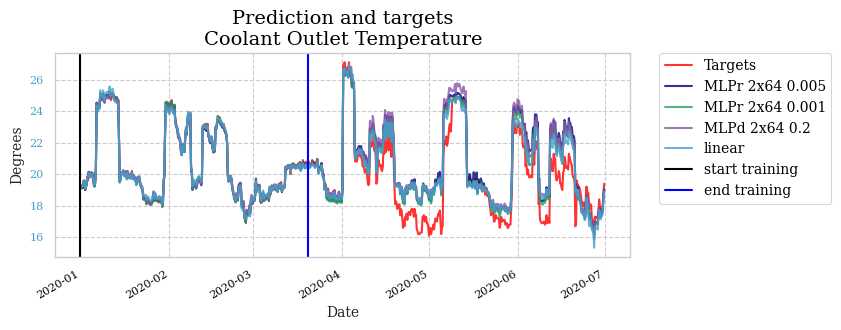

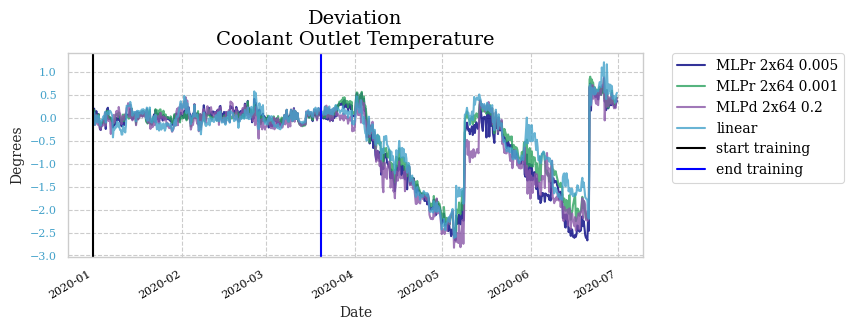

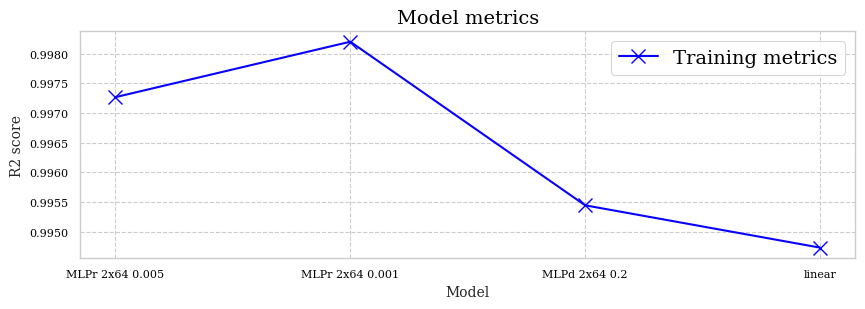

In [9]:
initAndPredict([
        mlpr_2_6, mlpr_2_7, mlpd_2_8, linear_r,
    ])

## Model evaluation 4
Again plotting the most promising models to see these in greater detail, we see that most of the models experience the same problems as for the less complex models. One exception is the model using dropout, which appears to form a somewhat more linear line than the remaining MLP models. However, this model fit has other problems visible in the deviation plot. After the fouling is reset around 2020-05-05, this model readjusts to a deviation of approx. 0.5 degrees, significantly more than the other models. The same phenomenom can be seen the second time fouling is reset, around 2020-06-20, this time to an even higher deviation. Due to the number of indivitual weights involved in the model calculations and resulting challenges related to neural network explainability, it's difficult to say why this model performs in this manner. Even so, it is considered encouraging that the model appears more linear than for the less complex model.

## Conclusion
Dropout is preferred for MLP models because it typically results in faster convergence times. The dropout parameter also requires less tuning than the regluarization parameters, as a data set with other means and standard deviations may require a different degree of regluarization in order to converge optimally.

Additional evidence is gathered that it is not arbitrary what hidden layer model structure is chosen for the MLP networks. The calculations performed here suggest complex models (e.g. more than one hidden layer) may be of interest with regards to fouling indication, given that the error observed after fouling is removed can be linked to lack of sufficient training data in the simulated data set rather than shortcompings of the model itself.

In [10]:
mlApi.reset()

# Dataset F

## Features and targets
Model A with the minimal number of features is chosen for comparing degrees of regularization. with the addition of an inlet pressure sensor (which is constant).

Features: Inlet Process Temperature, Outlet Process Temperature, Process Flow, Inlet Cooling Temperature, Cooling valve opening

Targets: Inlet Cooling Temperature

In [11]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('F', 'A', '30min')

In [12]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

### Models

Hidden layer sizes of 1x64 and 2x64 neurons are chosen as they are assumed complex enough to discover possible nonlinearities while still avoiding overfitting due to model complexity. A number of epochs ensuring model convergence is chosen, together with EarlyStopping and ModelCheckpoint callbacks that ensure the best set of weights are stored for predictive use.

Seven different rates of both Lasso and Ridge regularization are added, in addition to a linear model and a model using dropout.

In [13]:
mlpr_1_1 = mlApi.MLP('MLPr 1x64 1.0', layers=[64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr_1_2 = mlApi.MLP('MLPr 1x64 0.5', layers=[64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr_1_3 = mlApi.MLP('MLPr 1x64 0.1', layers=[64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr_1_4 = mlApi.MLP('MLPr 1x64 0.05', layers=[64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr_1_5 = mlApi.MLP('MLPr 1x64 0.01', layers=[64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr_1_6 = mlApi.MLP('MLPr 1x64 0.005', layers=[64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr_1_7 = mlApi.MLP('MLPr 1x64 0.001', layers=[64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpd_1_8 = mlApi.MLP('MLPd 1x64 0.2', layers=[64], dropout=0.2, epochs=5000)

mlpr_2_1 = mlApi.MLP('MLPr 2x64 1.0', layers=[64, 64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr_2_2 = mlApi.MLP('MLPr 2x64 0.5', layers=[64, 64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr_2_3 = mlApi.MLP('MLPr 2x64 0.1', layers=[64, 64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr_2_4 = mlApi.MLP('MLPr 2x64 0.05', layers=[64, 64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr_2_5 = mlApi.MLP('MLPr 2x64 0.01', layers=[64, 64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr_2_6 = mlApi.MLP('MLPr 2x64 0.005', layers=[64, 64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr_2_7 = mlApi.MLP('MLPr 2x64 0.001', layers=[64, 64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpd_2_8 = mlApi.MLP('MLPd 2x64 0.2', layers=[64, 64], dropout=0.2, epochs=5000)

linear_r = mlApi.Linear_Regularized('linear')

Model MLPr 1x64 1.0 was loaded from file
Model MLPr 1x64 0.5 was loaded from file
Model MLPr 1x64 0.1 was loaded from file
Model MLPr 1x64 0.05 was loaded from file
Model MLPr 1x64 0.01 was loaded from file
Model MLPr 1x64 0.005 was loaded from file
Model MLPr 1x64 0.001 was loaded from file
Model MLPd 1x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  MLPr 1x64 1.0  |  1.186202 |   1.186417  |    0.262456   |  348   |
|  MLPr 1x64 0.5  |   1.1862  |   1.18631   |    0.262976   |  435   |
|  MLPr 1x64 0.1  |  1.186195 |   1.186487  |    0.262161   |  352   |
|  MLPr 1x64 0.05 |  0.808803 |   1.182093  |    0.263772   |  498   |
|  MLPr 1x64 0.01 |  0.538542 |   1.14183   |    0.492913   |  

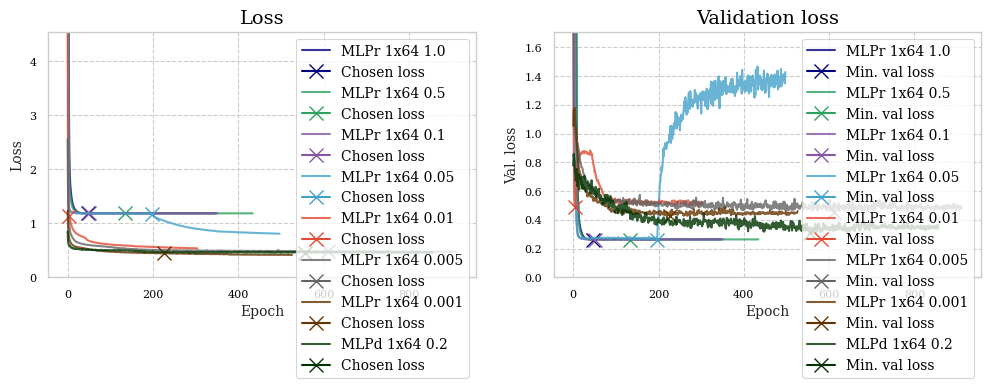

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
|  MLPr 1x64 1.0  |   -0.0014   |  -0.2035   |
|  MLPr 1x64 0.5  |   -0.0015   |  -0.2024   |
|  MLPr 1x64 0.1  |   -0.0013   |  -0.2041   |
|  MLPr 1x64 0.05 |    0.003    |  -0.1965   |
|  MLPr 1x64 0.01 |    0.1775   |   0.1177   |
| MLPr 1x64 0.005 |    0.5633   |  -0.1058   |
| MLPr 1x64 0.001 |    0.5909   |   0.035    |
|  MLPd 1x64 0.2  |    0.5919   |  -0.9177   |
|      linear     |    0.3234   |   0.0673   |
+-----------------+-------------+------------+


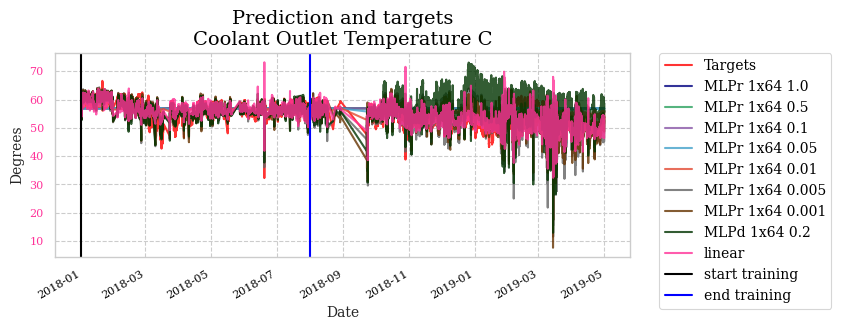

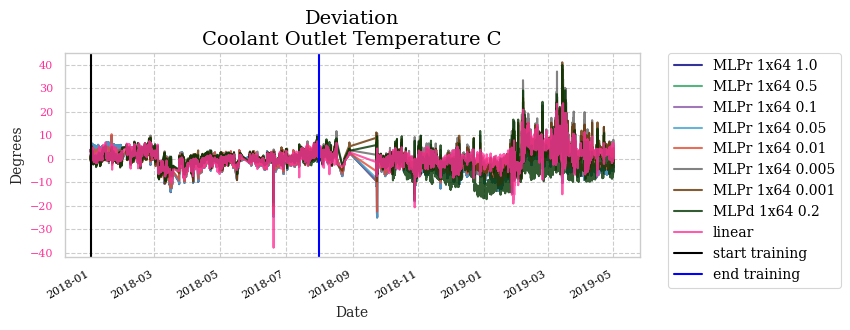

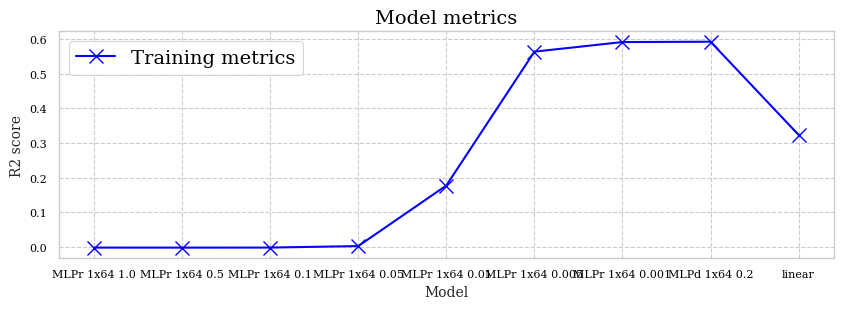

In [14]:
initAndPredict([
        mlpr_1_1, mlpr_1_2, mlpr_1_3, mlpr_1_4, mlpr_1_5, mlpr_1_6, mlpr_1_7, mlpd_1_8, linear_r,
    ])

## Model evluation 1
From the above model metrics, we see that model 1-3 with regularization ranging from 1.0 to 0.1 have converged to the dataset mean. This is indicated by the R2 score of 0. In short, this means the degree of regularization has been too high for the network to train appropriate weights, because any change in weights will result in a larger loss increase by penalizing the weights than loss decrease by fitting the model. Additionally, the following model with a regluarization level of 0.05 has converged to a state for which some areas of prediction show flat lines. This incidates a combination of input values that the models are not able to identify any degree of variation between, which is highly unlikely for any data sample of varying decimal values. This model can therefore be assumed to have converged to non-generalizing set of weights despite its relatively low loss values.

Note that the linear model has performed very poorly towards the start of the training period, even though the predictions made during the testing period appear resonable. There is reason to believe this model is very sensitive to some feature(s).

Model MLPr 1x64 0.005 was loaded from file
Model MLPr 1x64 0.001 was loaded from file
Model MLPd 1x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
| MLPr 1x64 0.005 |   0.4742  |   0.484894  |    0.452043   |  912   |
| MLPr 1x64 0.001 |  0.416821 |   0.443381  |    0.427238   |  527   |
|  MLPd 1x64 0.2  |  0.453016 |   0.461612  |    0.308568   |  857   |
+-----------------+-----------+-------------+---------------+--------+


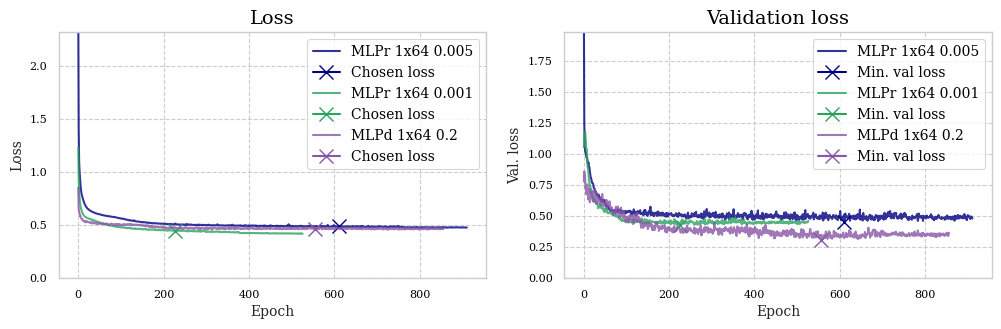

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| MLPr 1x64 0.005 |    0.5633   |  -0.1058   |
| MLPr 1x64 0.001 |    0.5909   |   0.035    |
|  MLPd 1x64 0.2  |    0.5919   |  -0.9177   |
|      linear     |    0.3234   |   0.0673   |
+-----------------+-------------+------------+


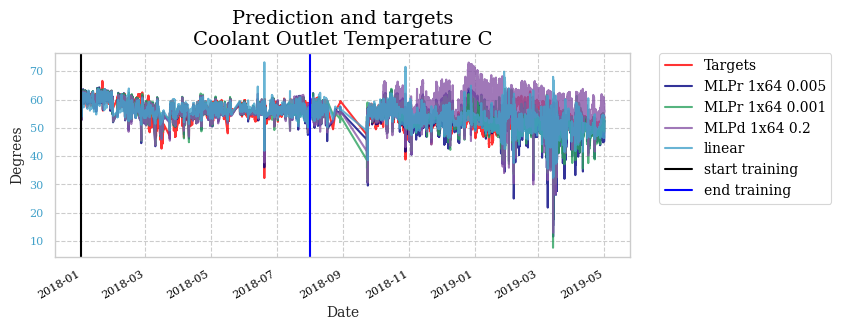

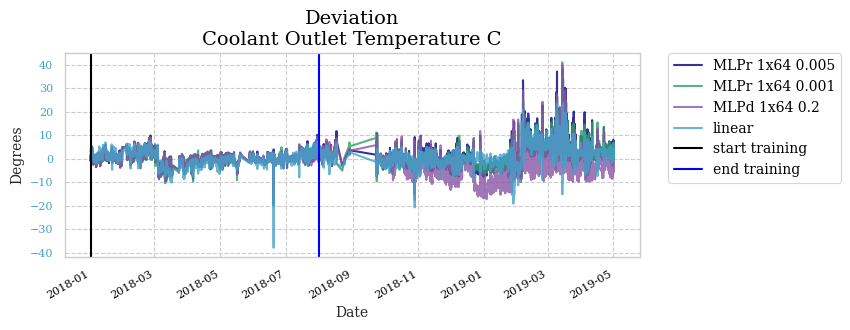

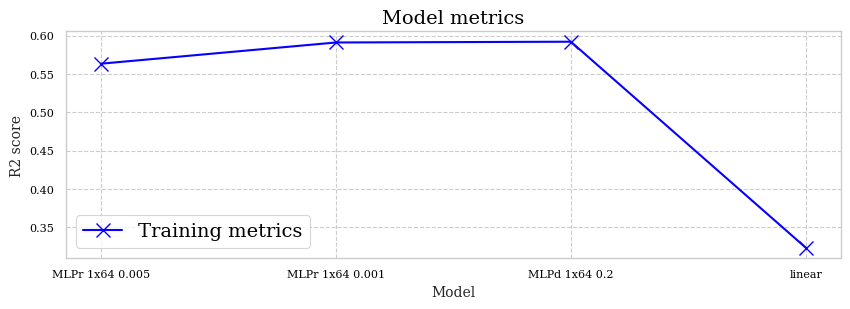

In [15]:
initAndPredict([
        mlpr_1_6, mlpr_1_7, mlpd_1_8, linear_r,
    ])

## Model evaluation 2
With the previously discussed models removed, we can easier graph the remaining models. The model using dropout scores best on the loss and R2 score metrics, however we can clearly see that the model predicts very varying values with deviation as high as 40 degrees throughout the end of the testing period. The model does not seem to have converged to a satisfying set of weights.

Although perhaps difficult to see, the MLP models have converged to more beliable curves despite worse metrics than the dropout model. We can see a clear degree in the deviation plot between 2018-11 and 2019-02, before the value resets to zero following a change of the exchange in use and builds up slowly once more. Some more troublesome results are shown towards the very end, with splikes of deviation as high as 20 degrees.

Model MLPr 2x64 1.0 was loaded from file
Model MLPr 2x64 0.5 was loaded from file
Model MLPr 2x64 0.1 was loaded from file
Model MLPr 2x64 0.05 was loaded from file
Model MLPr 2x64 0.01 was loaded from file
Model MLPr 2x64 0.005 was loaded from file
Model MLPr 2x64 0.001 was loaded from file
Model MLPd 2x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  MLPr 2x64 1.0  |  1.185746 |   1.187774  |    0.240144   |  355   |
|  MLPr 2x64 0.5  |  1.185894 |   1.185894  |    0.231527   |  410   |
|  MLPr 2x64 0.1  |  0.62875  |   0.673414  |    0.612144   |  485   |
|  MLPr 2x64 0.05 |  0.514573 |   0.564181  |    0.410234   |  496   |
|  MLPr 2x64 0.01 |  0.399093 |   0.465697  |    0.398606   |  

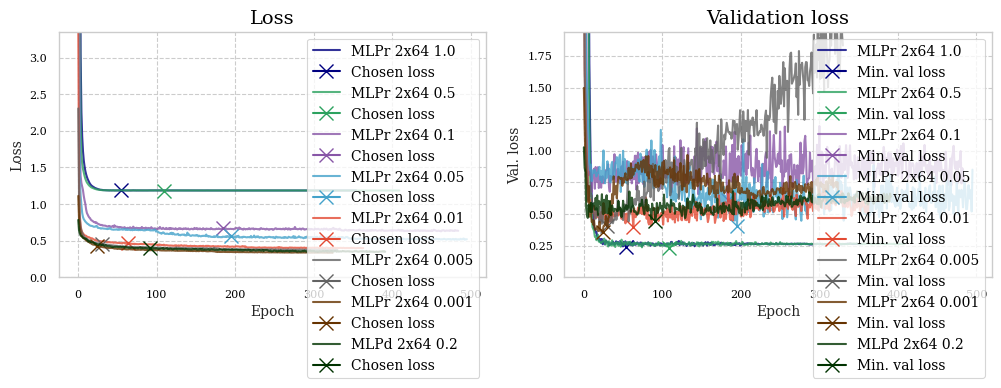

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
|  MLPr 2x64 1.0  |   -0.0007   |  -0.2604   |
|  MLPr 2x64 0.5  |   -0.0039   |  -0.2941   |
|  MLPr 2x64 0.1  |    0.3878   |  -1.7969   |
|  MLPr 2x64 0.05 |    0.4997   |  -1.2951   |
|  MLPr 2x64 0.01 |    0.5855   |  -0.3937   |
| MLPr 2x64 0.005 |    0.5951   |  -0.5838   |
| MLPr 2x64 0.001 |    0.6178   |  -0.2353   |
|  MLPd 2x64 0.2  |    0.6155   |   0.2204   |
|      linear     |    0.3234   |   0.0673   |
+-----------------+-------------+------------+


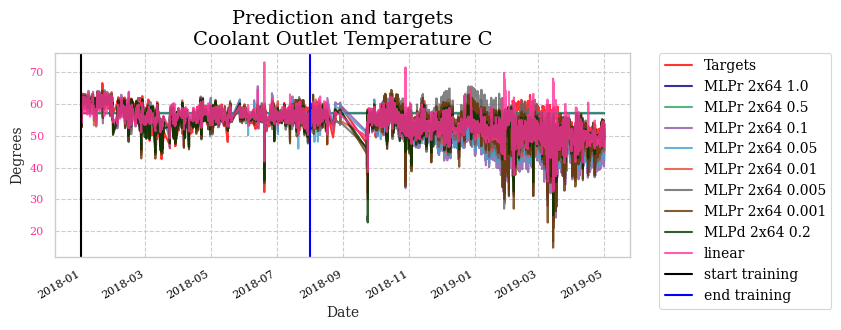

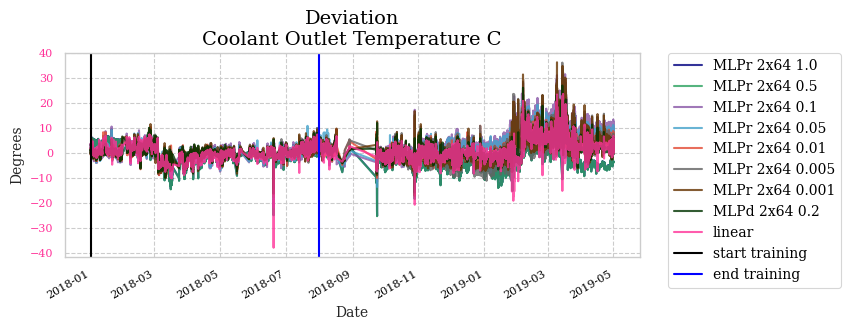

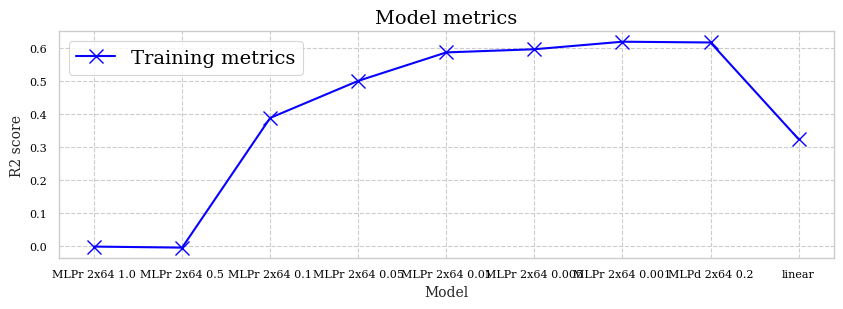

In [16]:
initAndPredict([
        mlpr_2_1, mlpr_2_2, mlpr_2_3, mlpr_2_4, mlpr_2_5, mlpr_2_6, mlpr_2_7, mlpd_2_8, linear_r,
    ])

## Model evaluation 3
Again, several models have converged to the data set means, while the model with the least amount of regluarization seems to have overfitted and thus predict largely unreasonable values. The linear model is as before.

Model MLPr 2x64 0.005 was loaded from file
Model MLPr 2x64 0.001 was loaded from file
Model MLPd 2x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[-0.22721561  0.45067128  0.35950102 -0.0655235 ]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
| MLPr 2x64 0.005 |  0.374126 |   0.455287  |    0.407172   |  331   |
| MLPr 2x64 0.001 |  0.335469 |   0.429775  |    0.359362   |  325   |
|  MLPd 2x64 0.2  |  0.346732 |   0.400488  |    0.444867   |  392   |
+-----------------+-----------+-------------+---------------+--------+


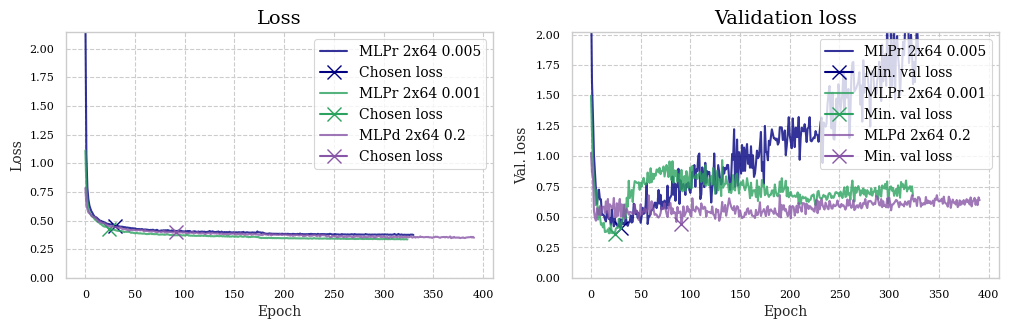

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| MLPr 2x64 0.005 |    0.5951   |  -0.5838   |
| MLPr 2x64 0.001 |    0.6178   |  -0.2353   |
|  MLPd 2x64 0.2  |    0.6155   |   0.2204   |
|      linear     |    0.3234   |   0.0673   |
+-----------------+-------------+------------+


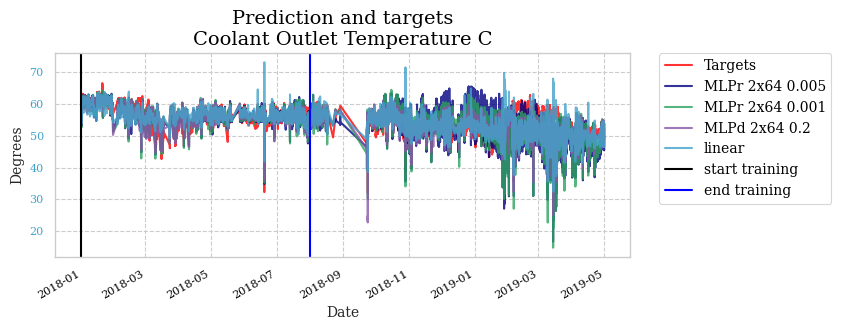

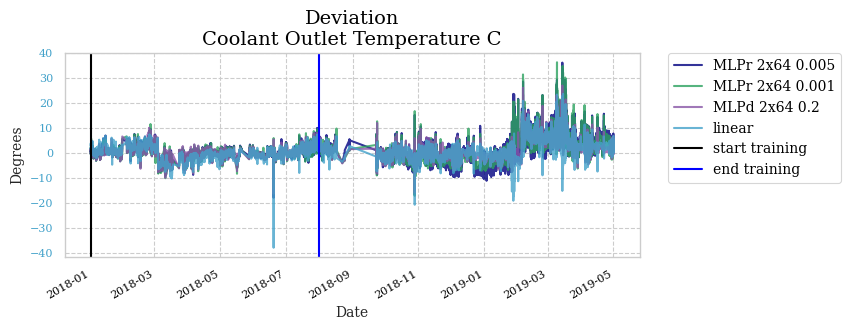

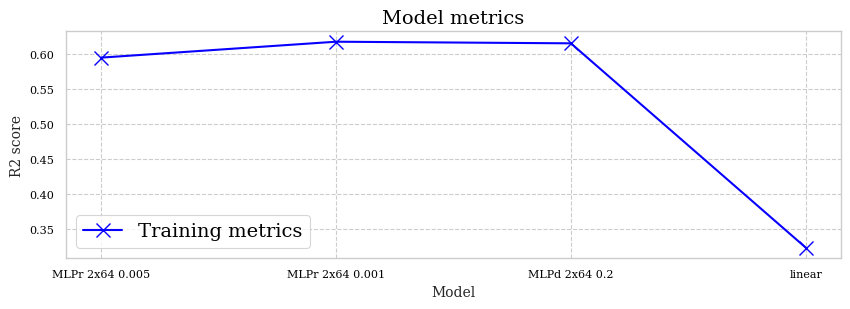

In [17]:
initAndPredict([
        mlpr_2_6, mlpr_2_7, mlpd_2_8, linear_r,
    ])

## Model evaluation 4
This time, the model using dropout once more performs best when considering the metrics. However, this time it seems to also have generalized well to the testing data set. Less variation is seen for this model than the remaining regluarization models. A gradual increase from 2018-11 to 2019-02 is seen before a reset to zero deviation following the cleaning. Once more, a gradual build up can be seen following this.

It's worth noting that the predictions of the dropout model are very consistent throughout the testing period, with a mean around 55 degrees. The lack of variation is almost alarming, although not entirely unreasonable considering the processing plant has reached maximum flow capasity around this time and maintains rather consistent input parameters with regards to flow and process side temperature during this time.

## Conclusion
As for the simulation dataset, the calculations performed here suggest complex models may be of interest with regards to fouling indication. The use of dropout and two (or more) hidden layers are advised for further research

In [18]:
mlApi.reset()

# Dataset G

## Features and targets
Model A with the minimal number of features is chosen for comparing degrees of regularization. with the addition of an inlet pressure sensor (which is constant).

Features: Inlet Process Temperature, Outlet Process Temperature, Process Flow, Inlet Cooling Temperature, Cooling valve opening

Targets: Inlet Cooling Temperature

In [19]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = configs.getConfig('G', 'A', '30min')

In [20]:
df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

Columns before removal: 
Col. 0 : PDI0064 - Process Pressure Difference
Col. 1 : TI0066 - Process Outlet Temperature
Col. 2 : TZI0012 - Process Inlet Temperature
Col. 3 : FI0010 - Process Flow Rate
Col. 4 : TT0025 - Coolant Inlet Temperature
Col. 5 : TT0026 - Coolant Outlet Temperature
Col. 6 : PI0001 - Coolant Inlet Pressure
Col. 7 : FI0027 - Coolant Flow Rate
Col. 8 : TIC0022U - Coolant Valve Opening
Col. 9 : PDT0024 - Coolant Pressure Difference

Columns after removal: 
Col. 0 : TI0066 - Process Outlet Temperature
Col. 1 : TZI0012 - Process Inlet Temperature
Col. 2 : FI0010 - Process Flow Rate
Col. 3 : TT0025 - Coolant Inlet Temperature
Col. 4 : TT0026 - Coolant Outlet Temperature

Finding data between 2019-04-10 00:00:00 and 2019-08-01 00:00:00
Found 4708 rows

Finding data between 2017-01-01 00:00:00 and 2020-03-01 00:00:00
Found 49290 rows



## Models
Hidden layer sizes of 1x64 and 2x64 neurons are chosen as they are assumed complex enough to discover possible nonlinearities while still avoiding overfitting due to model complexity. A number of epochs ensuring model convergence is chosen, together with EarlyStopping and ModelCheckpoint callbacks that ensure the best set of weights are stored for predictive use.

Seven different rates of both Lasso and Ridge regularization are added, in addition to a linear model and a model using dropout.

In [21]:
mlpr_1_1 = mlApi.MLP('MLPr 1x64 1.0', layers=[64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr_1_2 = mlApi.MLP('MLPr 1x64 0.5', layers=[64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr_1_3 = mlApi.MLP('MLPr 1x64 0.1', layers=[64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr_1_4 = mlApi.MLP('MLPr 1x64 0.05', layers=[64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr_1_5 = mlApi.MLP('MLPr 1x64 0.01', layers=[64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr_1_6 = mlApi.MLP('MLPr 1x64 0.005', layers=[64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr_1_7 = mlApi.MLP('MLPr 1x64 0.001', layers=[64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpd_1_8 = mlApi.MLP('MLPd 1x64 0.2', layers=[64], dropout=0.2, epochs=5000)

mlpr_2_1 = mlApi.MLP('MLPr 2x64 1.0', layers=[64, 64], l1_rate=1.0, l2_rate=1.0, epochs=5000)
mlpr_2_2 = mlApi.MLP('MLPr 2x64 0.5', layers=[64, 64], l1_rate=0.5, l2_rate=0.5, epochs=5000)
mlpr_2_3 = mlApi.MLP('MLPr 2x64 0.1', layers=[64, 64], l1_rate=0.1, l2_rate=0.1, epochs=5000)
mlpr_2_4 = mlApi.MLP('MLPr 2x64 0.05', layers=[64, 64], l1_rate=0.05, l2_rate=0.05, epochs=5000)
mlpr_2_5 = mlApi.MLP('MLPr 2x64 0.01', layers=[64, 64], l1_rate=0.01, l2_rate=0.01, epochs=5000)
mlpr_2_6 = mlApi.MLP('MLPr 2x64 0.005', layers=[64, 64], l1_rate=0.005, l2_rate=0.005, epochs=5000)
mlpr_2_7 = mlApi.MLP('MLPr 2x64 0.001', layers=[64, 64], l1_rate=0.001, l2_rate=0.001, epochs=5000)
mlpd_2_8 = mlApi.MLP('MLPd 2x64 0.2', layers=[64, 64], dropout=0.2, epochs=5000)

linear_r = mlApi.Linear_Regularized('linear')

Model MLPr 1x64 1.0 was loaded from file
Model MLPr 1x64 0.5 was loaded from file
Model MLPr 1x64 0.1 was loaded from file
Model MLPr 1x64 0.05 was loaded from file
Model MLPr 1x64 0.01 was loaded from file
Model MLPr 1x64 0.005 was loaded from file
Model MLPr 1x64 0.001 was loaded from file
Model MLPd 1x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[ 0.20895869 -0.1458707  -0.65796859 -0.50213313]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  MLPr 1x64 1.0  |  1.145431 |   1.145604  |    0.436535   |  422   |
|  MLPr 1x64 0.5  |  1.145433 |   1.145686  |    0.437024   |  411   |
|  MLPr 1x64 0.1  |  1.145424 |   1.145629  |    0.437002   |  599   |
|  MLPr 1x64 0.05 |  1.145423 |   1.14557   |    0.436617   |  440   |
|  MLPr 1x64 0.01 |  0.330522 |   0.345133  |    0.467307   |  

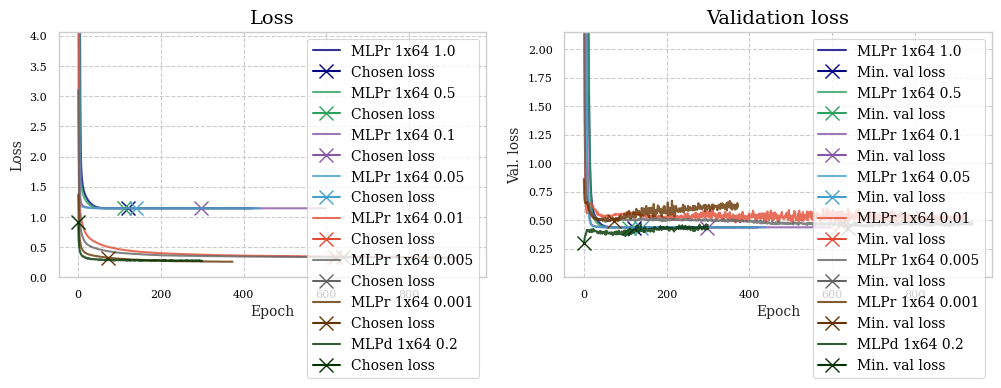

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
|  MLPr 1x64 1.0  |   -0.0036   |  -1.2502   |
|  MLPr 1x64 0.5  |   -0.0037   |  -1.2509   |
|  MLPr 1x64 0.1  |   -0.0037   |  -1.2509   |
|  MLPr 1x64 0.05 |   -0.0036   |  -1.2503   |
|  MLPr 1x64 0.01 |    0.6882   |  -4.7597   |
| MLPr 1x64 0.005 |    0.7083   |  -4.2225   |
| MLPr 1x64 0.001 |    0.7122   |  -3.7306   |
|  MLPd 1x64 0.2  |    0.4242   |  -1.2872   |
|      linear     |    0.4552   |  -1.4585   |
+-----------------+-------------+------------+


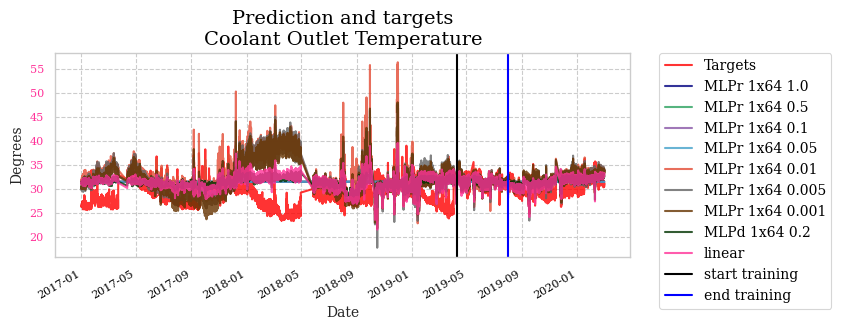

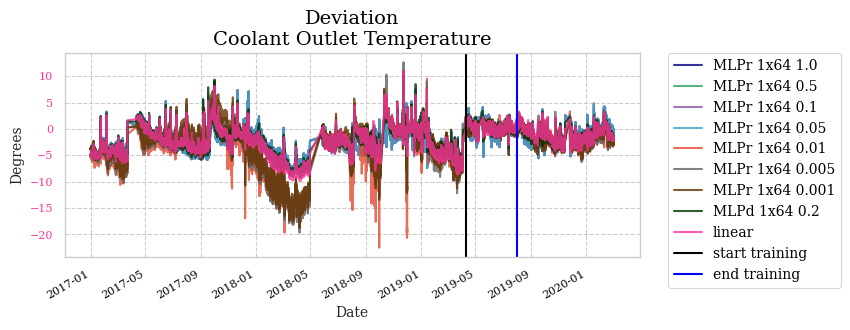

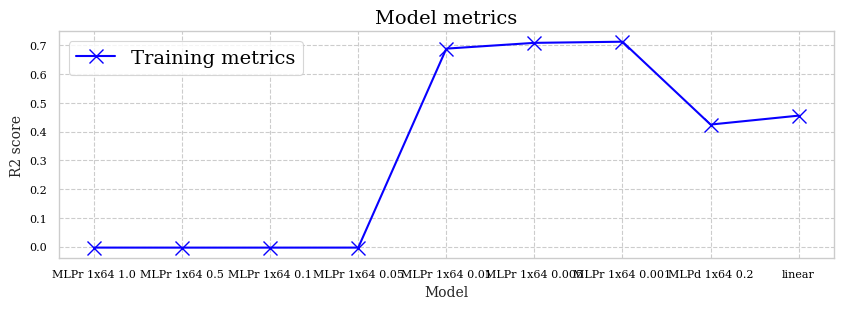

In [22]:
initAndPredict([
        mlpr_1_1, mlpr_1_2, mlpr_1_3, mlpr_1_4, mlpr_1_5, mlpr_1_6, mlpr_1_7, mlpd_1_8, linear_r,
    ])

## Model evluation 1
From the above model metrics, we see that model 1-3 with regularization ranging from 1.0 to 0.1 have converged to the dataset mean. This is indicated by the R2 score of 0. In short, this means the degree of regularization has been too high for the network to train appropriate weights, because any change in weights will result in a larger loss increase by penalizing the weights than loss decrease by fitting the model. Additionally, the following model with a regluarization level of 0.05 has converged to a state for which some areas of prediction show flat lines. This incidates a combination of input values that the models are not able to identify any degree of variation between, which is highly unlikely for any data sample of varying decimal values. This model can therefore be assumed to have converged to non-generalizing set of weights despite its relatively low loss values.

Note that the linear model has performed very poorly towards the start of the training period, even though the predictions made during the testing period appear resonable. There is reason to believe this model is very sensitive to some feature(s).

Model MLPr 1x64 0.005 was loaded from file
Model MLPr 1x64 0.001 was loaded from file
Model MLPd 1x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[ 0.20895869 -0.1458707  -0.65796859 -0.50213313]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
| MLPr 1x64 0.005 |  0.324773 |   0.334775  |    0.437893   |  941   |
| MLPr 1x64 0.001 |  0.25981  |   0.326345  |    0.492833   |  374   |
|  MLPd 1x64 0.2  |  0.268307 |   0.920713  |    0.301503   |  301   |
+-----------------+-----------+-------------+---------------+--------+


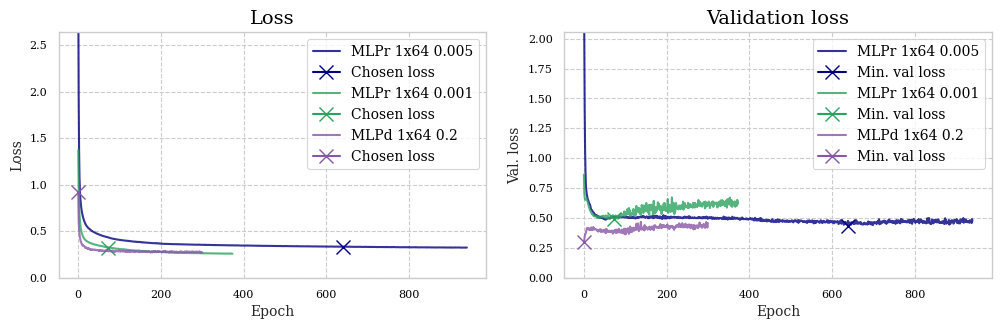

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| MLPr 1x64 0.005 |    0.7083   |  -4.2225   |
| MLPr 1x64 0.001 |    0.7122   |  -3.7306   |
|  MLPd 1x64 0.2  |    0.4242   |  -1.2872   |
|      linear     |    0.4552   |  -1.4585   |
+-----------------+-------------+------------+


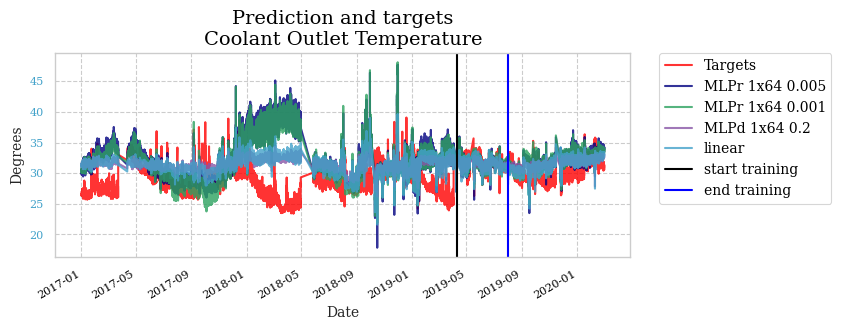

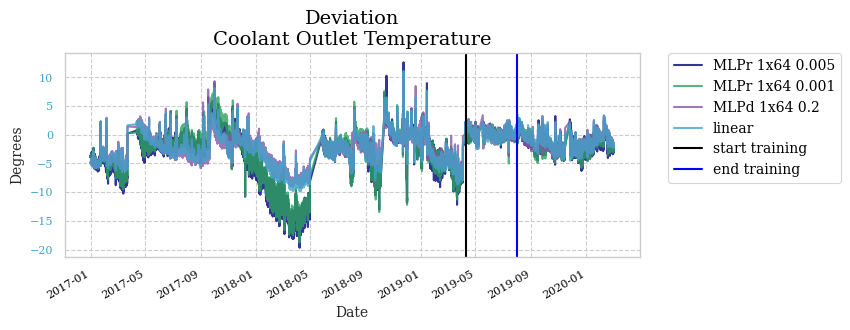

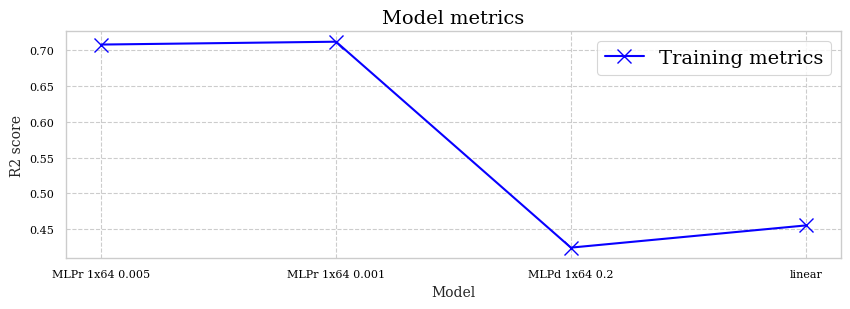

In [23]:
initAndPredict([
        mlpr_1_6, mlpr_1_7, mlpd_1_8, linear_r,
    ])

## Model evaluation 2
With the previously discussed models removed, we can easier graph the remaining models. The model using dropout scores best on the loss and R2 score metrics, however we can clearly see that the model predicts very varying values with deviation as high as 40 degrees throughout the end of the testing period. The model does not seem to have converged to a satisfying set of weights.

Although perhaps difficult to see, the MLP models have converged to more beliable curves despite worse metrics than the dropout model. We can see a clear degree in the deviation plot between 2018-11 and 2019-02, before the value resets to zero following a change of the exchange in use and builds up slowly once more. Some more troublesome results are shown towards the very end, with splikes of deviation as high as 20 degrees.

Model MLPr 2x64 1.0 was loaded from file
Model MLPr 2x64 0.5 was loaded from file
Model MLPr 2x64 0.1 was loaded from file
Model MLPr 2x64 0.05 was loaded from file
Model MLPr 2x64 0.01 was loaded from file
Model MLPr 2x64 0.005 was loaded from file
Model MLPr 2x64 0.001 was loaded from file
Model MLPd 2x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[ 0.20895869 -0.1458707  -0.65796859 -0.50213313]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
|  MLPr 2x64 1.0  |  1.145231 |   1.147867  |    0.405313   |  409   |
|  MLPr 2x64 0.5  |  1.144173 |   1.14762   |    0.386641   |  362   |
|  MLPr 2x64 0.1  |  0.370387 |   0.470272  |    0.399045   |  359   |
|  MLPr 2x64 0.05 |  0.33986  |   0.377006  |    0.439553   |  399   |
|  MLPr 2x64 0.01 |  0.263709 |   0.291064  |    0.508296   |  

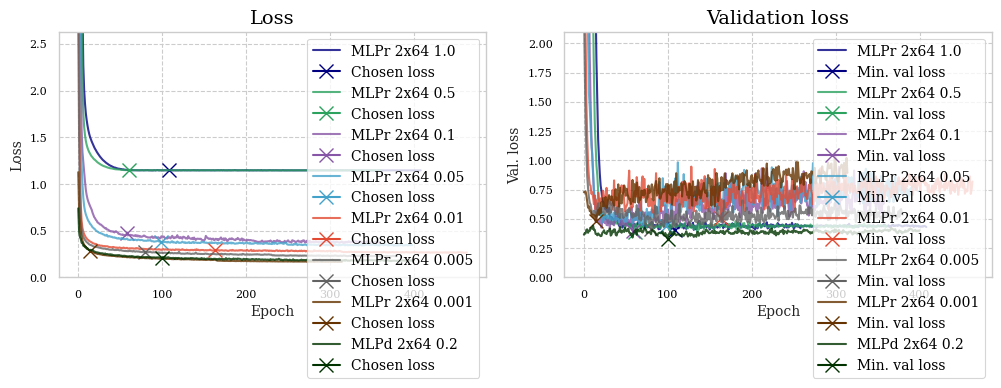

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
|  MLPr 2x64 1.0  |     -0.0    |  -1.1987   |
|  MLPr 2x64 0.5  |   -0.0011   |  -1.1605   |
|  MLPr 2x64 0.1  |    0.6366   |  -3.1648   |
|  MLPr 2x64 0.05 |    0.6543   |  -2.9077   |
|  MLPr 2x64 0.01 |    0.6988   |  -2.0202   |
| MLPr 2x64 0.005 |    0.7427   |  -1.0994   |
| MLPr 2x64 0.001 |    0.7502   |  -2.9743   |
|  MLPd 2x64 0.2  |    0.7936   |  -2.7393   |
|      linear     |    0.4552   |  -1.4585   |
+-----------------+-------------+------------+


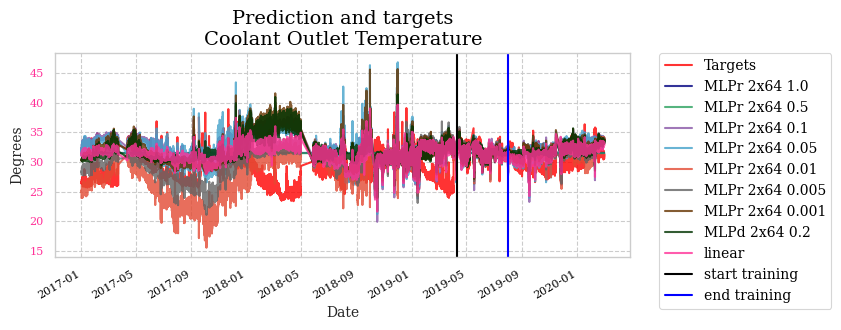

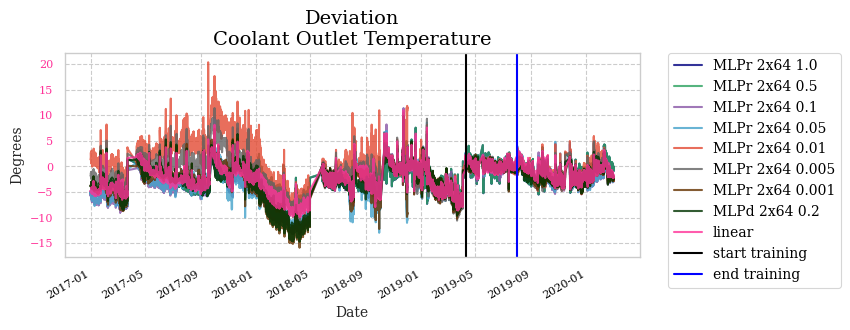

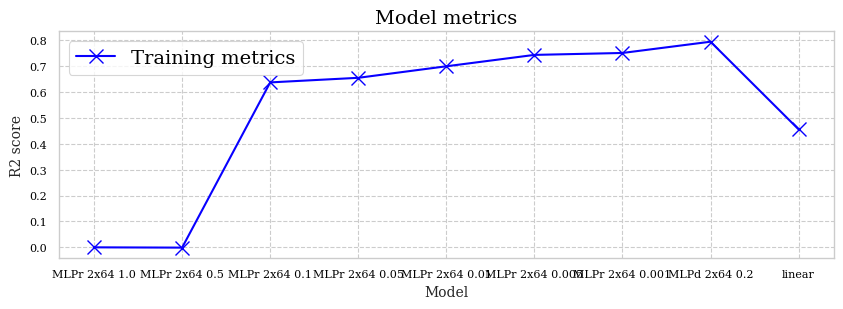

In [24]:
initAndPredict([
        mlpr_2_1, mlpr_2_2, mlpr_2_3, mlpr_2_4, mlpr_2_5, mlpr_2_6, mlpr_2_7, mlpd_2_8, linear_r,
    ])

## Model evaluation 3
Again, several models have converged to the data set means, while the model with the least amount of regluarization seems to have overfitted and thus predict largely unreasonable values. The linear model is as before.

Model MLPr 2x64 0.005 was loaded from file
Model MLPr 2x64 0.001 was loaded from file
Model MLPd 2x64 0.2 was loaded from file
Training model linear
    Trained weights for linear:
[[ 0.20895869 -0.1458707  -0.65796859 -0.50213313]]
+-----------------+-----------+-------------+---------------+--------+
|      Model      | Min. loss | Chosen loss | Min. val loss | Epochs |
+-----------------+-----------+-------------+---------------+--------+
| MLPr 2x64 0.005 |  0.226206 |   0.276048  |    0.412693   |  381   |
| MLPr 2x64 0.001 |  0.165344 |   0.285906  |    0.478757   |  315   |
|  MLPd 2x64 0.2  |  0.174848 |   0.210184  |    0.327575   |  401   |
+-----------------+-----------+-------------+---------------+--------+


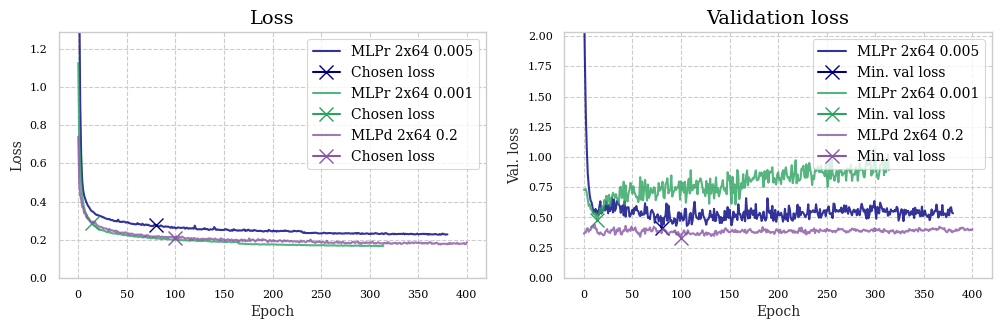

Model prediction scores
+-----------------+-------------+------------+
|      Model      | Train score | Test score |
+-----------------+-------------+------------+
| MLPr 2x64 0.005 |    0.7427   |  -1.0994   |
| MLPr 2x64 0.001 |    0.7502   |  -2.9743   |
|  MLPd 2x64 0.2  |    0.7936   |  -2.7393   |
|      linear     |    0.4552   |  -1.4585   |
+-----------------+-------------+------------+


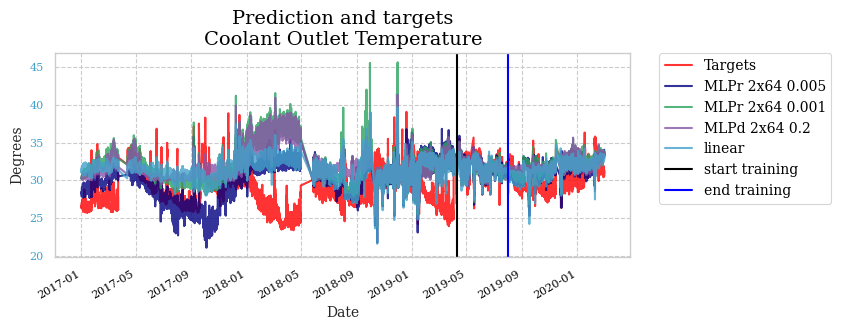

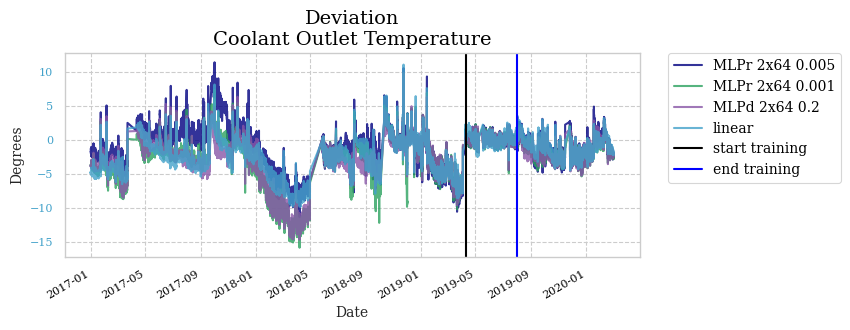

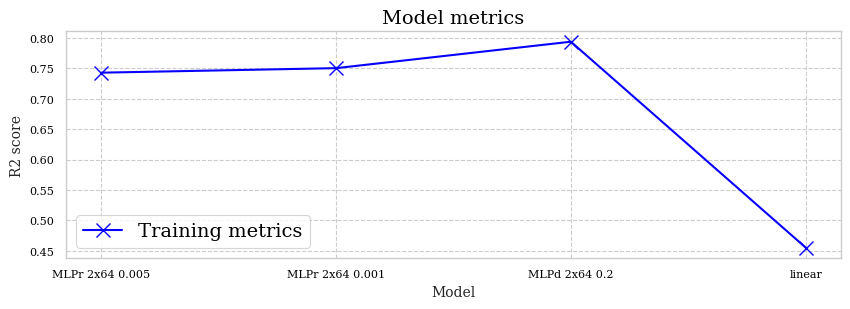

In [25]:
initAndPredict([
        mlpr_2_6, mlpr_2_7, mlpd_2_8, linear_r,
    ])

## Model evaluation 4
This time, the model using dropout once more performs best when considering the metrics. However, this time it seems to also have generalized well to the testing data set. Less variation is seen for this model than the remaining regluarization models. A gradual increase from 2018-11 to 2019-02 is seen before a reset to zero deviation following the cleaning. Once more, a gradual build up can be seen following this.

It's worth noting that the predictions of the dropout model are very consistent throughout the testing period, with a mean around 55 degrees. The lack of variation is almost alarming, although not entirely unreasonable considering the processing plant has reached maximum flow capasity around this time and maintains rather consistent input parameters with regards to flow and process side temperature during this time.

## Conclusion
As for the simulation dataset, the calculations performed here suggest complex models may be of interest with regards to fouling indication. The use of dropout and two (or more) hidden layers are advised for further research